Nog een keer hetzelfde programma alleen deze keer maak ik het met ctk. Dat is een Python UI library based on Tkinter die een nieuw, modernere widgets heeft.

In [15]:
# import sys
# !{sys.executable} -m pip install ctk

In [16]:
import tkinter as tk
import customtkinter as ctk
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [17]:
class App:
    def __init__(self):
        ctk.set_appearance_mode("dark")  # Modes: "System" (standard), "Dark", "Light"
        ctk.set_default_color_theme("blue")  # Themes: "blue" (standard), "green", "dark-blue"

        self.app = ctk.CTk()
        self.app.geometry("400x400")
        self.app.title("DataVisualisation App voor Biker")
        
        self.loginAttempts = 0
        self.createLogin()
        
        # wanneer de windows word gesloten sluit hij ook het programma.
        self.app.protocol("WM_DELETE_WINDOW", self.closeApp)
        

    def loginCheck(self):
        # gelezen logingegevens... Super Secure!!!
        creds = pd.read_csv('logingegevens.csv')

        # omzetten naar 2D array. [[username, password], [username, password], enz..]
        credsArr = creds.to_numpy()

        # check login input
        self.username = self.usernameEntry.get()
        self.password = self.passwordEntry.get()

        # loop series van namen en ww
        for arr in credsArr:
            # subset van naam == [0] en ww == [1]
            if arr[0] == self.username:
                if arr[1] == self.password:
                    # username en password zijn correct
                    self.loginOut(True)
                    return
        
        self.loginOut(False)
                
    def loginOut(self, out):
        if out == True:
            self.closeApp()
            m = Main()
            m.main.mainloop()

        # login pogingen staat op 2. de user heeft namelijk maar 3 pogingen.
        if self.loginAttempts >= 2 and out == False:
            # de reden voor and out == False is omdat als de user 2 keer zijn wachtwoord fout invult en daarna correct triggert hij ook als de 2e conditie er niet staat
            self.closeApp()
            e = ErrorWindow(reden="WW")
            e.window.mainloop()
            
        elif out == False:
            self.loginAttempts = self.loginAttempts + 1
            label = ctk.CTkLabel(master=self.loginWindow, text=f'Logingegevens zijn incorrect.')
            label.pack()

            labelMessage = ctk.CTkLabel(master=self.loginWindow, text=f'Dit is poging {self.loginAttempts}. u heeft nog {3- self.loginAttempts} pogingen')
            labelMessage.pack()
    
    def closeApp(self):
        self.app.quit()
        self.app.destroy()

    def startApp(self):
        self.app.mainloop()

    # maakt het loginscherm
    def createLogin(self):
        self.loginWindow = ctk.CTkFrame(master=self.app)
        self.loginWindow.pack(pady=20, padx=60, fill="both", expand=True)

        self.usernameEntry = ctk.CTkEntry(master=self.loginWindow, placeholder_text="Username:")
        self.usernameEntry.pack(pady=10, padx=10)

        self.passwordEntry = ctk.CTkEntry(master=self.loginWindow, placeholder_text="Password:", show="*")
        self.passwordEntry.pack()

        self.logInButton = ctk.CTkButton(master=self.loginWindow, text="Login!", command=self.loginCheck)
        self.logInButton.pack(pady=10, padx=10)
        
        self.close = ctk.CTkButton(master=self.loginWindow, text="Afsluiten", command=self.closeApp)
        self.close.pack()



In [18]:
class Main:
    def __init__(self):
        self.main = ctk.CTk()
        self.main.geometry("600X800")
        self.main.title("DataVisualisation App voor Biker")
        self.createFrames()
        self.theme = "dark"

        # wanneer de windows word gesloten sluit hij ook het programma.
        self.main.protocol("WM_DELETE_WINDOW", self.closeApp)

    def createFrames(self):
        self.frameSide = ctk.CTkFrame(master=self.main, width=400, height=600)
        self.frameSide.pack(expand=False, side="left", fill="y")
        self.frameSide.pack_propagate(False)
        self.fillFrameSide()

        self.frameMain = ctk.CTkFrame(master=self.main, width=1000, height=400)
        self.frameMain.pack(expand=False, side="right", fill="y")
        self.frameMain.pack_propagate(False)
        self.fillFrameMain()

    def fillFrameSide(self):
        self.options = ctk.CTkFrame(master=self.frameSide, width=400, height=700)
        # .pack(fill="none", expand=True) => centers widget! options aangemaakt voor style om de options te centeren in de sideFrame
        self.options.pack(fill="none", expand=True, ipady=10)
        self.label = ctk.CTkLabel(master=self.options, text="Kies hieronder data dat je wilt zien")
        # .pack(fill="none", expand=True) => centers widget!
        self.label.pack()

        self.artikelTaartButton = ctk.CTkButton(master=self.options, text="Verdeling van artikelen in een taart diagram", command=self.onArtikelTaartButton)
        self.artikelTaartButton.pack(pady=10, padx=20)

        self.artikelBarButton = ctk.CTkButton(master=self.options, text="Verdeling van artikelen in een bar diagram", command=self.onArtikelBarButton)
        self.artikelBarButton.pack(pady=10, padx=20)

        self.verdelingTaartButton = ctk.CTkButton(master=self.options, text="Verdeling van console uitgaven per jaar in taart diagram", command=self.onReleaseTaartButton)
        self.verdelingTaartButton.pack(pady=10, padx=20)        

        self.verdelingBarButton = ctk.CTkButton(master=self.options, text="Verdeling van console uitgaven per jaar in bar diagram", command=self.onReleaseBarButton)
        self.verdelingBarButton.pack(pady=10, padx=20) 

        self.close = ctk.CTkButton(master=self.options, text="Afsluiten", command=self.closeApp)
        self.close.pack(pady=10)

    # mainFrame word gevult opn basis van de keuzes links!
    def fillFrameMain(self):
        self.components = ctk.CTkFrame(master=self.frameMain, width=800, height=700)
        self.components.pack(fill="none", expand=True)
        self.components.pack_propagate(False)

        self.label = ctk.CTkLabel(master=self.components, text="Maak een keuze in het menu links!")
        self.label.pack(fill="none", expand=True)

    # button functions
    def onArtikelTaartButton(self):
        self.diagram = Diagram("taartA", "artikel", self.theme)
        self.createWindow(self.diagram.fig)
        self.createInfo("ArtikelTaart")
    
    def onArtikelBarButton(self):
        self.diagram = Diagram("barA", "artikel", self.theme)
        self.createWindow(self.diagram.fig)
        self.createInfo("ArtikelBar")

    def onReleaseTaartButton(self):
        self.diagram = Diagram("taartR", "release", self.theme)
        self.createWindow(self.diagram.fig)
        self.createInfo("ReleaseTaart")

    def onReleaseBarButton(self):
        self.diagram = Diagram("barR", "release", self.theme)
        self.createWindow(self.diagram.fig)
        self.createInfo("ReleaseBar")

    def createWindow(self, figure):
        self.resetComponents()
        self.canvasFrame = ctk.CTkFrame(master=self.components)
        self.canvasFrame.pack()
        canvas = FigureCanvasTkAgg(figure, self.canvasFrame)
        canvas.draw()

        label = ctk.CTkLabel(text="Hello there!", master=self.components)
        label.pack()

        canvas.get_tk_widget().pack(fill="none", expand=True)
    
    def createInfo(self, info):
        self.textbox = ctk.CTkTextbox(master=self.components, width=500, wrap="word")
        if info == "ArtikelTaart":
            self.textbox.insert(index="0.0", text="Hierboven zie je info over de verdeling tussen het aantal spellen en consoles in een taart diagram")
            self.textbox.pack()
        elif info == "ArtikelBar":
            self.textbox.insert(index="0.0", text="Hierboven zie je info over de verdeling tussen het aantal spellen en consoles in een Bar diagram")
            self.textbox.pack()
        elif info == "ReleaseTaart":
            self.textbox.insert(index="0.0", text="Hierboven zie je een Taart diagram die laat zie hoeveel consoles er uit kwamen uit welk jaar.")
            self.textbox.pack()
        elif info == "ReleaseBar":
            self.textbox.insert(index="0.0", text="Hierboven zie je een Bar diagram die laat zie hoeveel consoles er uit kwamen uit welk jaar.")
            self.textbox.pack()

    def resetComponents(self):
        for widget in self.components.winfo_children():
            widget.destroy()


    def closeApp(self):
        self.main.quit()
        self.main.destroy()


Ik heb resetComponents() toegevoegd omdat zodra de user een keuze maakt in het keuzemenu moet main leeg zijn en nieuwe data komen obv de keuze. zie comments over de werking.  <br>
De array winfo_children word gevuld met alle widgets die aanwezig zijn voordat een keuze word gemaakt. de functie destroyStartMain() loopt dan door alle widgets en .destroy() op alle widgets. <br>

```
def resetComponents(self):
    for widget in self.components.winfo_children():
        widget.destroy()
```


In [19]:
class Diagram:
    def __init__(self, diaType, dataType, theme):
        self.diaType = diaType
        self.dataType = dataType
        self.theme = theme

        self.getData(self.dataType)
        self.setValuesDiagram(self.diaType, self.theme)

    def setValuesDiagram(self, diaType, theme):
        # first we check for the theme! if dark then dark colors if white then white colors
        if theme == "dark":
            self.fig.set_facecolor("#3C3C3B")
            self.ax.set_facecolor("#3C3C3B")
            if diaType == "taartR":
                self.ax.pie(self.y, labels = self.xUnique, startangle = 90, autopct='%1.1f%%', textprops={'color':"w"})
                self.ax.set_title("Aantal console releases per jaar", color="white")
            elif diaType == "taartA":
                self.ax.pie(self.val, labels = self.labels, startangle = 90, autopct='%1.1f%%', textprops={'color':"w"})
                self.ax.set_title("Pie chart over de verdeling van alle artikelen!", color="white")
            elif diaType == "barR" or diaType == "barA":
                self.ax.tick_params(axis="both", colors="white")
                if diaType == "barR":
                    self.ax.set_title("Aantal console releases per jaar", color="white")
                    self.ax.bar(self.xUnique, self.y)
                    self.ax.set_ylabel("Aantal", color="white")
                    self.ax.set_xlabel("Jaar", color="white")
                elif diaType == "barA":
                    self.ax.bar(self.labels, self.val)
                    self.ax.set_title("Bar chart over de verdeling tussen consoles en artikelen!", color="white")
        # TODO waneer themes word geimplementeerd
        elif theme == "white":
            pass
    
    def getData(self, dataType):
        if dataType == "artikel":
            self.fig, self.ax = plt.subplots()
            self.labels = ["Spellen", "Consoles"]
            colSpel = ["TITEL"]
            colConsole = ["TYPE"]
            dataSpel = pd.read_csv('Artikel.csv', usecols=colSpel, encoding='latin-1')
            dataConsole = pd.read_csv('Artikel.csv', usecols=colConsole, encoding='latin-1')
            dataConsole.dropna(inplace=True)
            dataSpel.dropna(inplace=True)
            self.val = [dataSpel.size, dataConsole.size]
        elif dataType == "release":
            self.fig, self.ax = plt.subplots()
            # self.fig.set_facecolor("#3C3C3B")
            col = ["JAAR_UITGAVE"]
            data = pd.read_csv('console.csv', usecols=col)
            self.xUnique = num.unique(data)
            count = data.value_counts()
            self.y = []
            for i in self.xUnique:
                self.y.append(count.get(i))


In [20]:
class ErrorWindow:
    def __init__(self, reden):
        self.reden = reden
        self.window = ctk.CTk()
        self.window.title("DataVisualisation App voor Biker")

        if self.reden == "WW":
            self.message = "U heeft 3 keer de verkeerde logingegevens ingevuld. De applicatie sluit nu."
        else:
            self.message = "Error is unknown"            

        errorMessage = ctk.CTkLabel(master=self.window, text=self.message)
        errorMessage.pack()

        # wanneer de windows word gesloten sluit hij ook het programma.
        self.window.protocol("WM_DELETE_WINDOW", self.closeApp)


    def closeApp(self):
        self.window.quit()
        self.window.destroy()


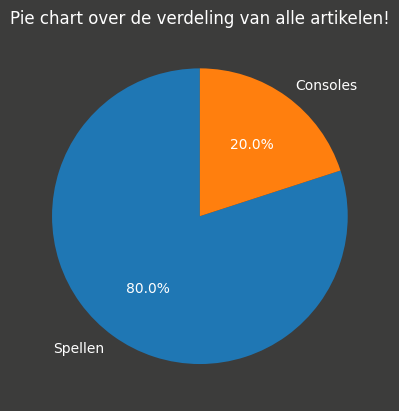

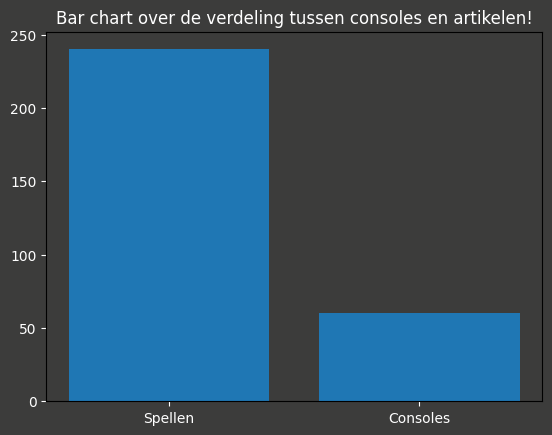

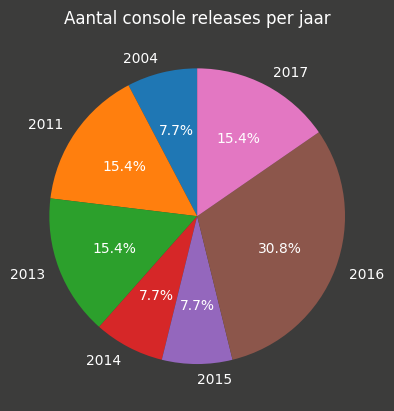

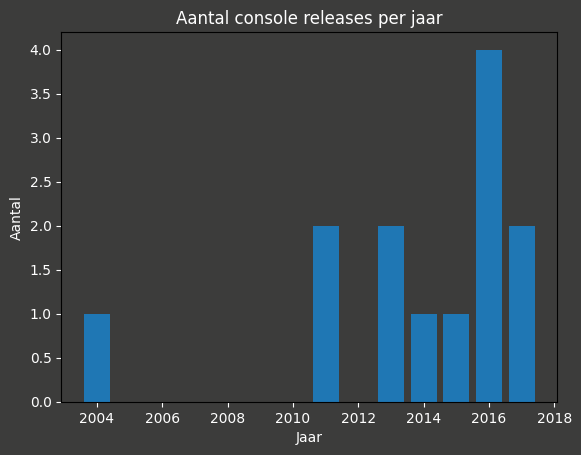

In [21]:
if __name__ == "__main__":
    x = App()
    x.startApp()

    # x = Main()
    # x.main.mainloop()
